In [ ]:
# rule based learning 

students = ['tola','wale','ade']

name = input('Enter your name: ')
if name not in students:
    print(f'Your are not a student')
else:
    print(f'Welcome {name}')

Your are not a student


### Linear Regression Algorithm

In [29]:
# import the needed libraries 
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('dark')
sns.set_palette('husl')

# libraries for ml and data modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# load the sample dataset
from sklearn.datasets import load_diabetes

In [10]:
# load the dataset
X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [32]:
y[:5]

array([151.,  75., 141., 206., 135.])

<Axes: >

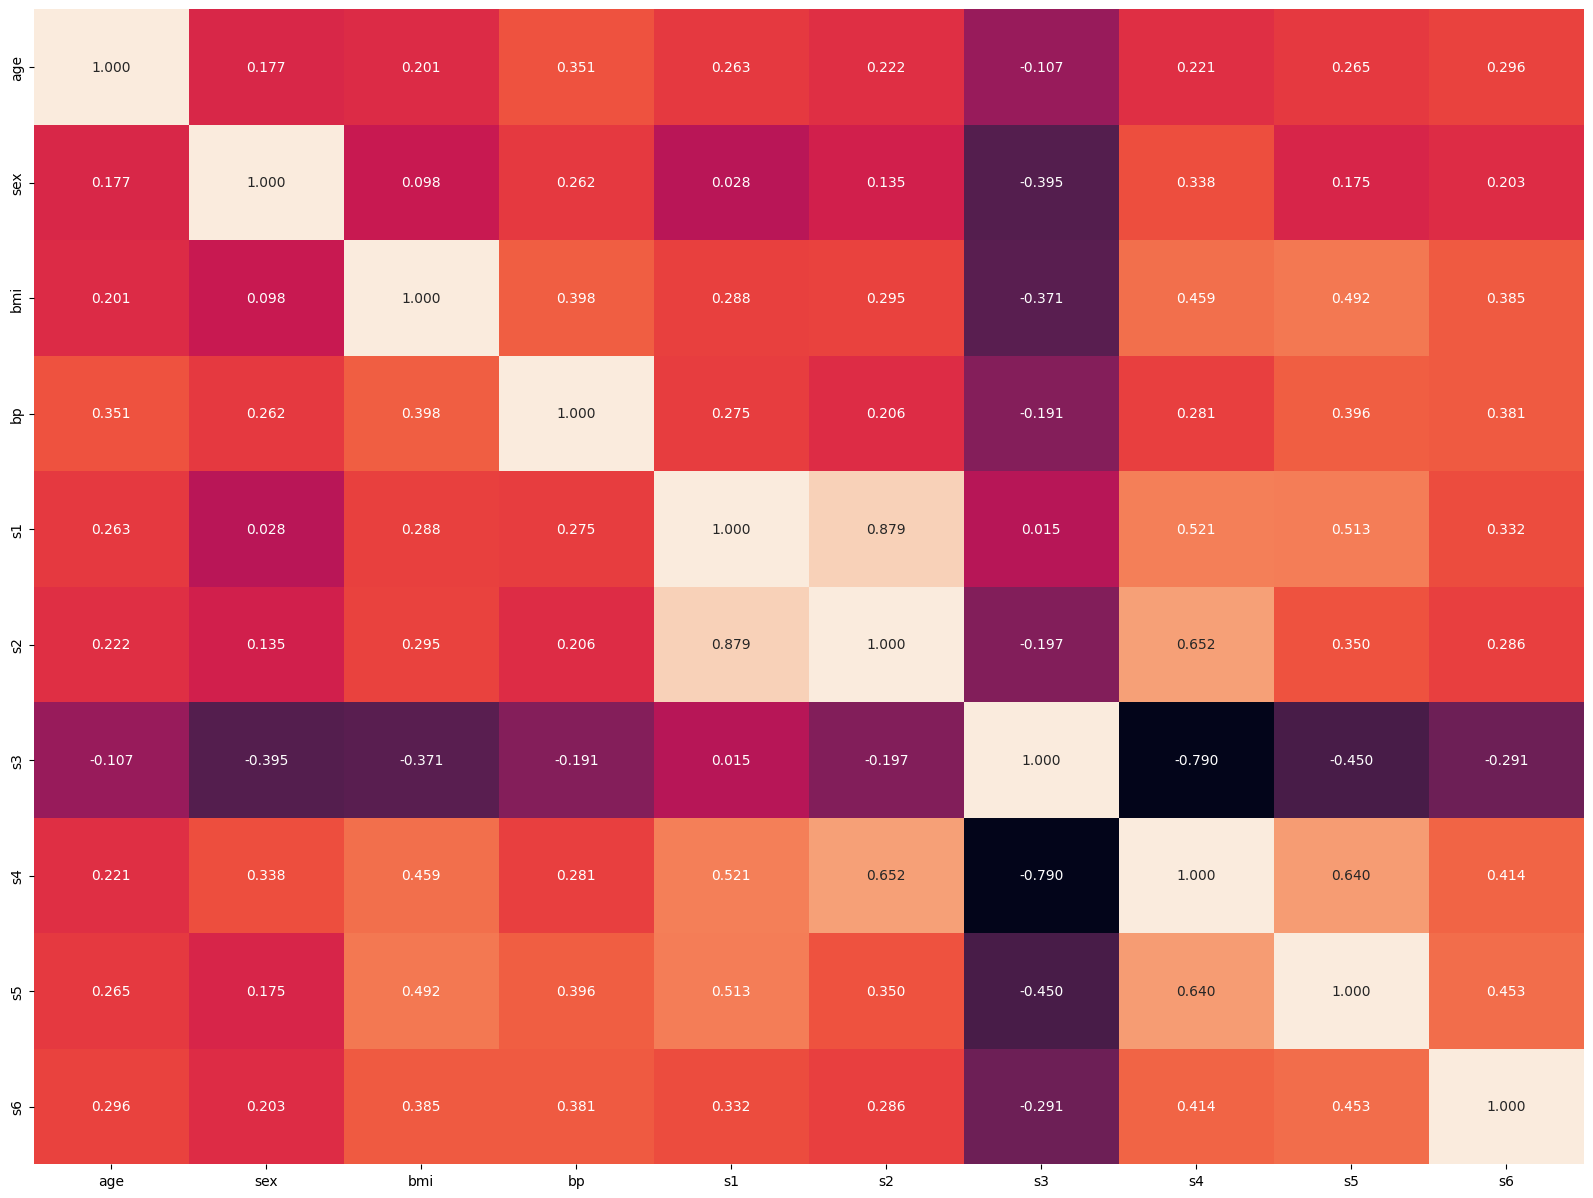

In [18]:
# correlation check

data_corr = X.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(data=data_corr, annot=True,fmt='0.03f', cbar = False)

<Axes: xlabel='age', ylabel='bmi'>

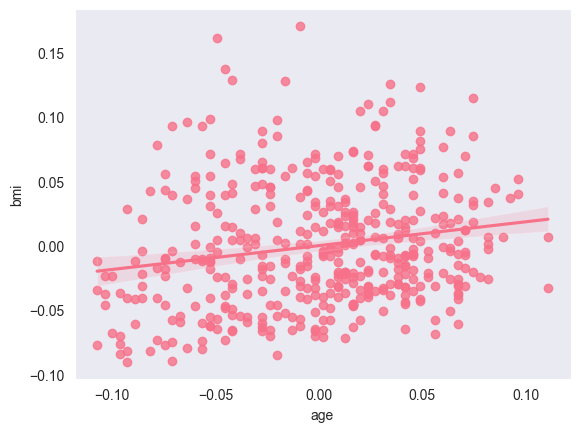

In [21]:
sns.regplot(data=X, x = 'age', y = 'bmi')

### Train the Regression the Model

In [22]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=23)
for i in [X_train, X_test, y_train, y_test]:
    print(f'{i.shape}')

(353, 10)
(89, 10)
(353,)
(89,)


In [24]:
# initialize the model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# get prediction for the test set
test_preds = model.predict(X_test)

### Model Evaluation

In [26]:
# manually evaluate model performance
print(f'prediction: {test_preds[:5]}')
print(f'Actual: {y_test[:5]}')

prediction: [290.8985031  132.81832981 140.44601181  30.52576133 200.92486072]
Actual: [258. 103. 116. 104. 221.]


In [27]:
# compute the rmse for the test prediction
test_rmse = root_mean_squared_error(y_true=y_test, 
                                    y_pred=test_preds)
print(f'test_rmse: {test_rmse}')

test_rmse: 56.316841346469786


In [31]:
# compute coefficient of determination

coeff_score = r2_score(y_true=y_test, y_pred=test_preds)
print(f'coefficient of determination: {round(coeff_score, 4)}')

coefficient of determination: 0.4588


## assignment

Write a a short medium article on Linear regression with focus on:
1. model assumptions
2. model Evaluation
3. Pros and Cons